# ABSTRAC 
## Dataset elegido: **Estadisticas Delictuales en Chile desde 2010 a 2023**

### Introducción:
Este trabajo plantea el análisis y evolución sobre diferentes delitos a lo largo de una década en el vecino país de Chile, en el mismo se incluye información sobre:
- Homicidios
- Robos/hurtos
- Violencia Familiar (Sobre niños, mujeres, hombres y adultos mayores)

### Hipótesis planteadas:
- Se cree que los indices de violencia familiar a los largo de estos 10 años deberian ir en descenso por la concientización y educación social al respecto.
- Se cree que el género podría influir en las estadisticas de violencia, siendo el femenino mas propenso a ser victima de ello.
- Se estima que la tasa de homicidios pudo haberse incrementado al igual que la de Robos/hurtos por las crisis economicosociales de los últimos años.

## Objetivos:
Poder trabajar la información, obteniendo datos que nos permitan validar las hipótesis planteadas y a traves de los mismos ayudar a plantear estratégias que aborden las distintas problemáticas de manera adecuada.

## Outliers:
Poder identificar si a lo largo de esta última década podemos encontrar outliers, sobre todo en los indices de violencia intrafamiliar.

## Primeras Observaciones:
De acuerdo a las primeras visualizaciones logradas, podemos observar una notable diferencia entre casos de violencia sobre mujeres, con respecto a hombre, ancianos y niños, además de una fuerte desaceleración de casos desde 2010 a la fecha.
Sobre Robos y hurtos, a primera vista se observa una baja en la cantidad de denuncias, por el contrario a Homicidios que tuvo su pico mas alto dentro del registro de los ultimos años.










In [1]:
# Importo librerías

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns



In [162]:
# levanto dataset en excel
# Imprimo las primeras 10 filas

df_delitos= pd.read_excel ("estadisticas.delitos.xlsx")
print (df_delitos.head(10))

    AÑO         MES  Homicidios  Hurtos  Lesiones  Robos  Robo vehículo   \
0  2010       ENERO          28    9142      6723   4114            2270   
1  2010     FEBRERO          19    8083      5433   3568            2210   
2  2010       MARZO          18    7783      6527   3447            2375   
3  2010       ABRIL          15    8432      6248   3587            2480   
4  2010        MAYO          14    9121      6189   3844            2632   
5  2010       JUNIO          14    8998      5864   3988            2410   
6  2010       JULIO          12    9383      4991   4253            2674   
7  2010      AGOSTO          26    9617      5825   4366            2469   
8  2010  SEPTIEMBRE          23    9062      6220   4100            2301   
9  2010     OCTUBRE          24    9638      6665   4227            2637   

   Delitos sexuales  Violencia s/adulto mayor  Violencia s/ hombres  \
0               657                       136                  1422   
1               593  

In [163]:
# Describo el dataset

df_delitos.describe ()

,AÑO,Homicidios,Hurtos,Lesiones,Robos,Robo vehículo,Delitos sexuales,Violencia s/adulto mayor,Violencia s/ hombres,Violencia s/mujer,Violencia s/niños
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,2016.111111,29.259259,8339.296296,4272.376543,4986.506173,2357.271605,920.919753,207.401235,1275.407407,6769.333333,344.351852
std,4.107258,13.432858,1724.211253,1159.300255,994.751751,379.892597,265.970156,72.831505,216.061601,1013.135757,95.171599
min,2010.000000,10.000000,3636.000000,1965.000000,2842.000000,1264.000000,511.000000,97.000000,882.000000,4640.000000,121.000000
25%,2013.000000,20.000000,7878.500000,3495.750000,4232.250000,2157.250000,736.250000,157.000000,1132.250000,5946.000000,267.250000
50%,2016.000000,26.000000,8861.500000,4062.500000,4924.000000,2446.500000,843.000000,179.000000,1241.000000,6708.000000,355.000000
75%,2020.000000,35.000000,9517.750000,4959.250000,5653.000000,2629.250000,1044.750000,234.250000,1364.750000,7317.750000,414.750000
max,2023.000000,73.000000,10738.000000,7101.000000,8196.000000,3037.000000,1763.000000,418.000000,1975.000000,9388.000000,541.000000


In [164]:
# Busco datos nulos en el dataset

print(df_delitos.isnull(). sum())

AÑO                         0
MES                         0
Homicidios                  0
Hurtos                      0
Lesiones                    0
Robos                       0
Robo vehículo               0
Delitos sexuales            0
Violencia s/adulto mayor    0
Violencia s/ hombres        0
Violencia s/mujer           0
Violencia s/niños           0
dtype: int64


In [165]:
# Establezco nuevo df para graficar sobre homicidios 2010 al 2023

df_homicidios= df_delitos [["Homicidios","AÑO"]].groupby (by=["AÑO"]).sum().reset_index ()
print (df_homicidios)


     AÑO  Homicidios
0   2010         474
1   2011         195
2   2013         224
3   2014         302
4   2015         307
5   2016         282
6   2017         303
7   2018         335
8   2019         363
9   2020         538
10  2021         437
11  2022         660
12  2023         320


<Axes: xlabel='AÑO', ylabel='Homicidios'>

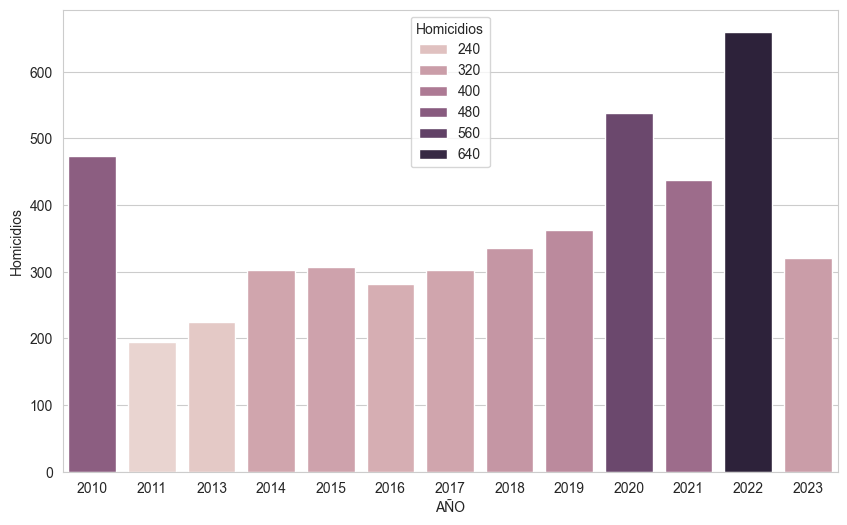

In [183]:
# Gráfico del nuevo df_homicidios

plt.figure(figsize=(10,6))
sns.color_palette("Set2")
sns.barplot (x="AÑO", y= "Homicidios", hue= "Homicidios", data= df_homicidios)



In [185]:
# Establezco un nuevo DF para comparar violencias en distintos ambitos familiares

df_violencia= df_delitos [["Violencia s/adulto mayor","Violencia s/ hombres", "Violencia s/mujer","Violencia s/niños","AÑO"]].groupby (by=["AÑO"]).sum().reset_index ()
print (df_violencia)

     AÑO  Violencia s/adulto mayor  Violencia s/ hombres  Violencia s/mujer  \
0   2010                      3641                 31059             183641   
1   2011                      2047                 15759              89249   
2   2013                      1936                 15367              87203   
3   2014                      1949                 14914              81866   
4   2015                      2030                 13924              75391   
5   2016                      1952                 13345              72672   
6   2017                      1996                 13340              70654   
7   2018                      2200                 13163              67063   
8   2019                      2695                 14652              72780   
9   2020                      3219                 13819              70778   
10  2021                      3982                 17825              89586   
11  2022                      3882                 1

Text(0.5, 0, 'Años')

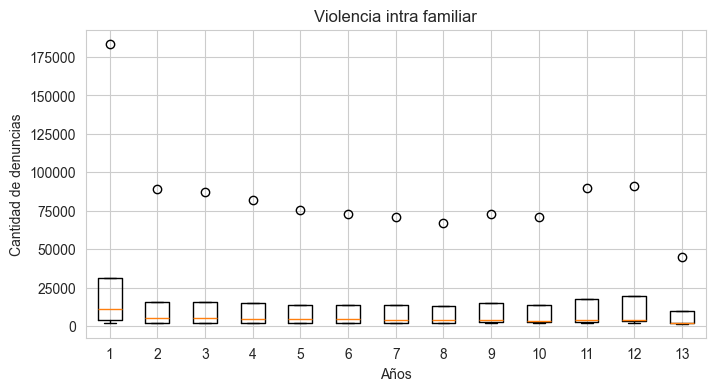

In [250]:
# Identifico Outliers en df sobre violencia familiar

fig, ax = plt.subplots (figsize=(8,4))
ax.boxplot(df_violencia.T)
ax.set_title ("Violencia intra familiar")
ax.set_ylabel ("Cantidad de denuncias")
ax.set_xlabel ("Años")



In [289]:
# Armo un nuevo DF para poder visualizar la información en un solo gráfico de líneas

df_violencia2 = df_violencia.melt (id_vars= "AÑO", var_name="Grupo", value_name= "Violencia")
print (df_violencia2.head(10))

    AÑO                     Grupo  Violencia
0  2010  Violencia s/adulto mayor       3641
1  2011  Violencia s/adulto mayor       2047
2  2013  Violencia s/adulto mayor       1936
3  2014  Violencia s/adulto mayor       1949
4  2015  Violencia s/adulto mayor       2030
5  2016  Violencia s/adulto mayor       1952
6  2017  Violencia s/adulto mayor       1996
7  2018  Violencia s/adulto mayor       2200
8  2019  Violencia s/adulto mayor       2695
9  2020  Violencia s/adulto mayor       3219


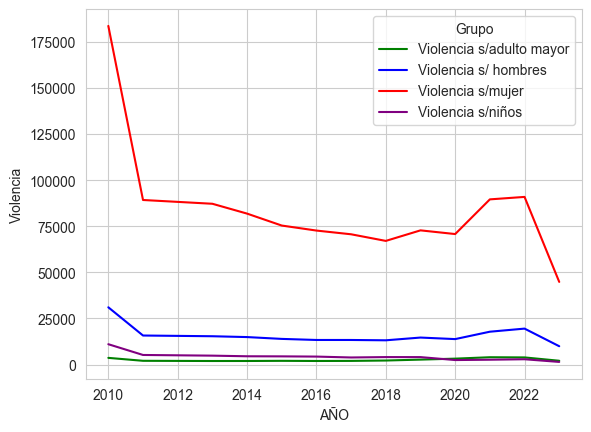

In [261]:
#Realizo el gráfico de líneas con el nuevo df_violencia2

sns.lineplot (data= df_violencia2, x= "AÑO", y="Violencia", hue= "Grupo", palette= ["green", "blue","red", "purple"])
plt.show()

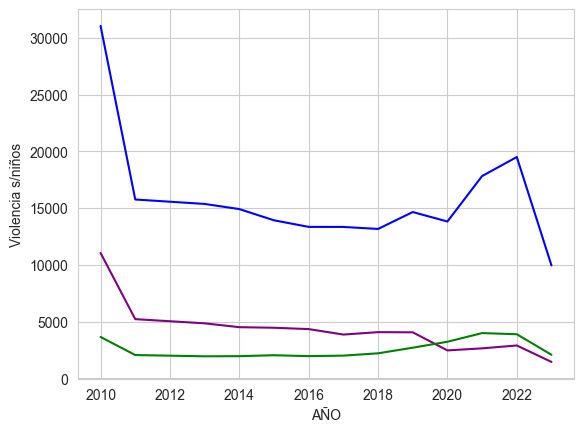

In [265]:
# Grafico nuevamente quitando información sobre mujeres para poder visualizar mejor el resto de las variables.

sns.lineplot(data= df_violencia, x="AÑO", y="Violencia s/niños", color= "purple")
sns.lineplot (data= df_violencia, x="AÑO", y="Violencia s/ hombres", color= "blue")
sns.lineplot (data= df_violencia, x="AÑO", y="Violencia s/adulto mayor", color= "green")
plt.show()

In [290]:
# Establezco un nuevo df para robos

df_robos= df_delitos [["Robos","Hurtos","AÑO"]].groupby (by=["AÑO"]).sum().reset_index ()
print (df_robos.head())

    AÑO   Robos  Hurtos
0  2010  103205  228862
1  2011   48134  114723
2  2013   52027  115631
3  2014   59572  117372
4  2015   61264  111989


In [291]:
#Agrupo valores para poder realizar gráfico de barras

df_robos2 = df_robos.melt (id_vars= "AÑO", var_name="Grupo", value_name= "Robos/Hurtos")
print (df_robos2.head())

    AÑO  Grupo  Robos/Hurtos
0  2010  Robos        103205
1  2011  Robos         48134
2  2013  Robos         52027
3  2014  Robos         59572
4  2015  Robos         61264


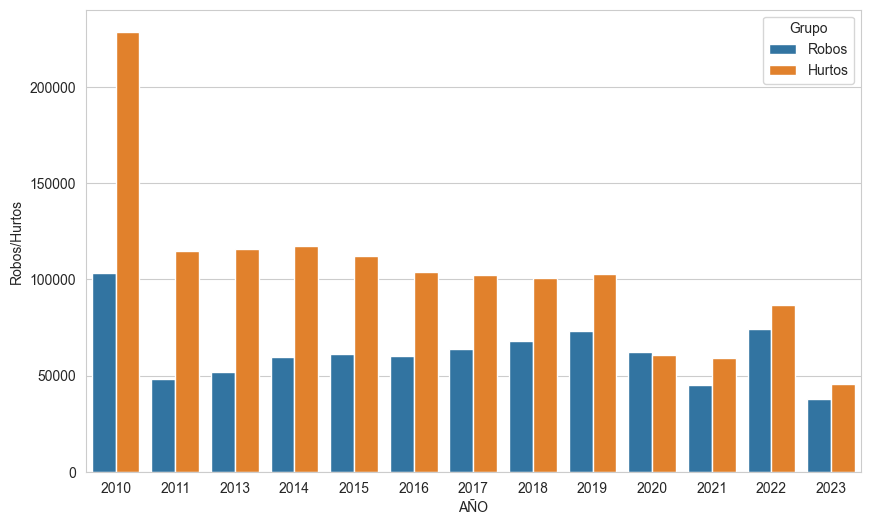

In [286]:
#Realizo visualización sobre la iunformación de Robos y Hurtos

plt.figure(figsize=(10,6))
sns.color_palette("hls",8)
sns.barplot (x="AÑO", y= "Robos/Hurtos", hue= "Grupo", data= df_robos2)
plt.show()